In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

df_train = pd.read_csv("../train.csv")
df_translated = pd.read_csv("translated.csv")

In [3]:
# stack the dataframes
df = pd.concat([df_train, df_translated], axis=0)
df

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
96175,44301dfb14hi,"अपने लिए उन्होंने अतातुर्क, या तुर्कों का पिता...",अतातुर्क तुर्की राष्ट्र के पिता थे।,hi,Hindi,0
96176,44301dfb14sw,"Kwa ajili yake mwenyewe alichagua Atat??rk, au...",Ataturk alikuwa baba wa taifa la Uturuki.,sw,Swahili,0
96177,44301dfb14vi,"Về phần mình, anh ấy đã chọn Atatırk, hay Cha ...",Ataturk là cha đẻ của dân tộc Thổ Nhĩ Kỳ.,vi,Vietnamese,0
96178,44301dfb14es,"Para sí eligió a Atat??rk, o Padre de los turcos.",Ataturk fue el padre de la nación turca.,es,Spanish,0


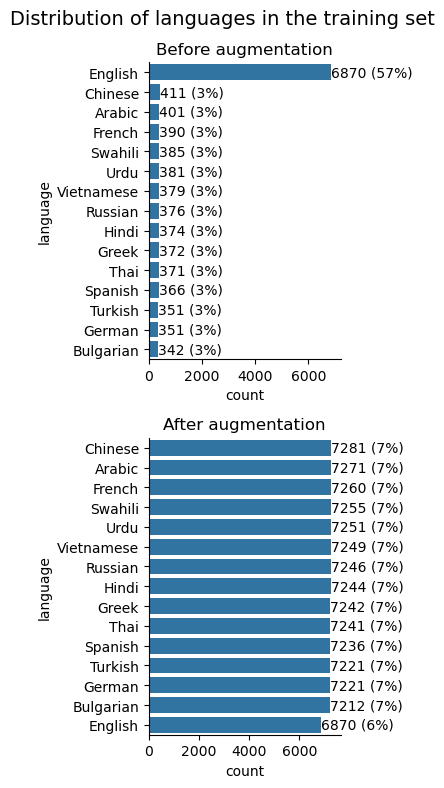

In [10]:
f, axs = plt.subplots(2, 1, figsize=(4, 8))

sns.set_color_codes("pastel")
sns.despine()
ax_left = sns.countplot(
    data=df_train,
    y="language",
    order=df_train["language"].value_counts().index,
    ax=axs[0],
)

abs_values_left = df_train["language"].value_counts(ascending=False)
rel_values_left = (
    df_train["language"].value_counts(ascending=False, normalize=True).values * 100
)
lbls_left = [f"{p[0]} ({p[1]:.0f}%)" for p in zip(abs_values_left, rel_values_left)]

ax_left.bar_label(container=ax_left.containers[0], labels=lbls_left)
ax_left.set_title("Before augmentation")


sns.set_color_codes("pastel")
sns.despine()
ax_right = sns.countplot(
    data=df, y="language", order=df["language"].value_counts().index, ax=axs[1]
)

abs_values_right = df["language"].value_counts(ascending=False)
rel_values_right = (
    df["language"].value_counts(ascending=False, normalize=True).values * 100
)
lbls_right = [f"{p[0]} ({p[1]:.0f}%)" for p in zip(abs_values_right, rel_values_right)]

ax_right.bar_label(container=ax_right.containers[0], labels=lbls_right)
ax_right.set_title("After augmentation")


plt.suptitle("Distribution of languages in the training set", fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Load the tokenizer and model
CHECKPOINT = "./checkpoint-3000"  # replace this with your specific checkpoint
tokenizer = AutoTokenizer.from_pretrained(CHECKPOINT)
model = AutoModelForSequenceClassification.from_pretrained(
    CHECKPOINT, output_attentions=True, num_labels=3
)


# Function to get model attentions
def get_model_attentions(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    attentions = outputs.attentions[-1]  # Get the last layer attentions
    attentions = attentions.mean(0)  # Average over heads
    return attentions.squeeze(0)


# Example sentence
sentence = "He came, he opened the door and I remember looking back and seeing the expression on his face, and I could tell that he was disappointed. Just by the look on his face when he came through the door I just knew that he was let down."

attentions = get_model_attentions(sentence)


# Visualization of the attention
def visualize_attention(sentence, attentions):
    tokens = tokenizer.tokenize(sentence)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(attentions.mean(0).detach().numpy(), cmap="viridis")

    ax.set_xticks(range(len(tokens)))
    ax.set_yticks(range(len(tokens)))
    ax.set_xticklabels(tokens, rotation=90)
    ax.set_yticklabels(tokens)

    ax.set_xlabel("Head")
    ax.set_ylabel("Position")
    ax.set_title("Attention Weights")
    plt.show()


visualize_attention(sentence, attentions)